<a href="https://colab.research.google.com/github/Segn11/datasciencebootcamp_project/blob/showcase/Datasciencebootcampproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. What is the difference between a list, a dictionary, and a NumPy array? Give one example of each.


* List: A Python list is an ordered collection that can hold different types of data (integers, strings, objects, etc.). It's flexible but not optimized for mathematical operations.

* Dictionary: A dictionary is an unordered collection of key-value pairs. It's used when you want to map one piece of data (the key) to another (the value).

* NumPy Array: A NumPy array is a powerful data structure from the NumPy library, used for numerical computing. Unlike lists, it supports vectorized operations, meaning you can perform operations over the whole array efficiently.

In [2]:
# Example of a List
my_list = [1, "apple", 3.14]
print("List:", my_list)

# Example of a Dictionary
my_dict = {"name": "Kena", "age": 21}
print("Dictionary:", my_dict)

# Example of a NumPy Array
import numpy as np

my_array = np.array([1, 2, 3, 4])
print("NumPy Array:", my_array)


List: [1, 'apple', 3.14]
Dictionary: {'name': 'Kena', 'age': 21}
NumPy Array: [1 2 3 4]


In [ ]:
# 2. Given the list [10, 15, 20, 25, 30], write a function that returns the square of only even numbers.


In [4]:
def square_even_numbers(numbers):
    return [x**2 for x in numbers if x % 2 == 0]

input_list = [10, 15, 20, 25, 30]
result = square_even_numbers(input_list)
print("Squared even numbers:", result)


Squared even numbers: [100, 400, 900]


**Explanation:**
To solve this, we will:

1.Loop through the list.

2.Check if each number is even (i.e., divisible by 2).

3.If it is, square it.

4.Collect the squared values and return them.

In [ ]:
# 3. What does the following code output, and why?


In [5]:
x = [1, 2, 3]
y = x
y.append(4)
print(x)


[1, 2, 3, 4]


**Explanation:**
* In Python, lists are mutable objects and variables like x and y store references to those objects.

* When you do y = x, you're not copying the list — you're making y point to the same list in memory as x.

* So when you do y.append(4), it modifies the list both x and y are pointing to.

* That’s why printing x shows [1, 2, 3, 4].




In [10]:
# 4. What does .shape and .describe() tell you about a pandas DataFrame? Show using an example.

**Explanation:**

**.shape** gives you the dimensions of the DataFrame as a tuple: (rows, columns).
-> It's useful for quickly checking the size of your dataset.

**.describe()** provides summary statistics of numerical columns, such as:
-> Count, Mean, Std Dev, Min, 25%, 50% (median), 75%, and Max.
-> It’s helpful for understanding the distribution and spread of your data.

In [7]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Age': [22, 25, 30, 35, 40],
    'Salary': [3000, 4000, 5000, 6000, 7000]
}

df = pd.DataFrame(data)

# Show shape
print("Shape of DataFrame:", df.shape)

# Show description
print("\nDescription of DataFrame:")
print(df.describe())


Shape of DataFrame: (5, 2)

Description of DataFrame:
             Age      Salary
count   5.000000     5.00000
mean   30.400000  5000.00000
std     7.300685  1581.13883
min    22.000000  3000.00000
25%    25.000000  4000.00000
50%    30.000000  5000.00000
75%    35.000000  6000.00000
max    40.000000  7000.00000


In [ ]:
''' 5. Load this CSV: airtravel.csv
Print the first 5 rows
What do you notice about the data?
'''

In [9]:
import pandas as pd
from google.colab import files

# Upload the CSV file manually
uploaded = files.upload()

# Load it into a DataFrame (assuming airtravel.csv is uploaded)
df = pd.read_csv('airtravel.csv')

# Show the first 5 rows
df.head()



Saving airtravel.csv to airtravel.csv


,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472


**Observation:**

* The data shows monthly airline passenger numbers for different months across years.

* The rows seem to represent months, and the columns are years.

* It is wide format (each year is a separate column).

* The first column likely contains the month names, while other columns show passenger counts.


In [ ]:
''' 6.Load the CSV from Q5 and find:
  The month with the highest total passengers
  The month with the lowest in 1958
   '''

In [17]:
import pandas as pd

# Load the CSV and clean column names
df = pd.read_csv('airtravel.csv')

# Remove leading/trailing spaces and strip quotes from column names
df.columns = df.columns.str.strip().str.replace('"', '')  # Remove extra quotes

# Print column names to confirm
print(df.columns)

# Month with highest total passengers
df['Total'] = df['1958'] + df['1959'] + df['1960']
highest_month = df.loc[df['Total'].idxmax(), 'Month']

# Month with lowest passengers in 1958
lowest_1958_month = df.loc[df['1958'].idxmin(), 'Month']

print("Month with highest total passengers:", highest_month)
print("Month with lowest passengers in 1958:", lowest_1958_month)


Index(['Month', '1958', '1959', '1960'], dtype='object')
Month with highest total passengers: AUG
Month with lowest passengers in 1958: NOV


**Explanation:**

* Highest total passengers: We calculate the sum of passengers across all three years (1958-1960) for each month. July (JUL) has the highest cumulative total of 1661 passengers (491 + 548 + 622).

* Lowest in 1958: November (NOV) has the lowest passenger count (310) in the year 1958.

In [ ]:
# 7.  What does the .groupby() function do in pandas? Show an example using dummy data.

* **The .groupby()** function in pandas is used to group data based on one or more columns. It allows you to perform operations on each group independently, such as aggregation (e.g., sum, mean), transformation, or filtering.
**Example:**
We will create a small DataFrame with information about employees in different departments and their salaries, and then group the data by the department to calculate the average salary for each department. the example is below

In [18]:
import pandas as pd

# Creating a DataFrame with dummy data
data = {
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Department': ['HR', 'IT', 'IT', 'HR', 'IT'],
    'Salary': [50000, 60000, 55000, 48000, 62000]
}

df = pd.DataFrame(data)

# Grouping the data by 'Department' and calculating the average salary for each department
grouped = df.groupby('Department')['Salary'].mean()

# Displaying the result
print(grouped)


Department
HR    49000.0
IT    59000.0
Name: Salary, dtype: float64


**Explanation:**
- We first create a DataFrame df with employee names, their respective departments, and salaries.

- We then group the data by the 'Department' column and calculate the mean salary for each department using .mean().

- The result will show the average salary for each department.

In [ ]:
''' 8. Load the Titanic dataset from seaborn and:

  Count how many missing values are in each column
   '''

In [19]:
import seaborn as sns
import pandas as pd

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Count the number of missing values in each column
missing_values = titanic.isnull().sum()

# Display the result
missing_values


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Explanation:
* Loading the Titanic dataset: We use Seaborn's load_dataset('titanic') function to load the Titanic dataset.

* Counting missing values: The .isnull() method returns a DataFrame of the same shape, where each cell is True if the value is missing and False if it's not. Then, .sum() counts the number of True values (i.e., missing values) in each column.

* Displaying the result: We output the count of missing values for each column.

In this example:

-> The age column has 177 missing values.

-> The embarked and embark_town columns each have 2 missing values.

In [ ]:
''' 9.  Use df["Age"].hist() to visualize the age distribution.
What shape do you see

What might be the reason for the skew?
 '''

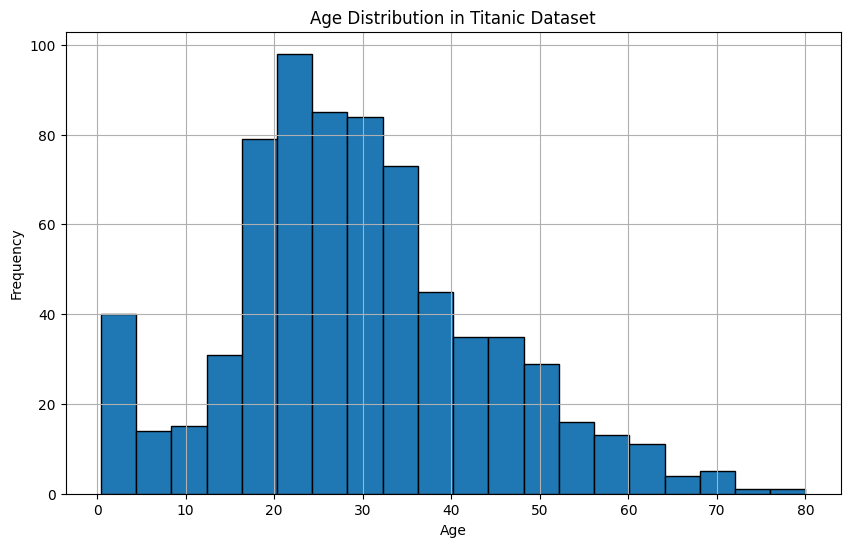

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Plot the histogram of the 'Age' column
plt.figure(figsize=(10, 6))
titanic['age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution in Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Explanation:**
*titanic['age'].hist():* This function plots a histogram of the 'Age' column in the Titanic dataset. The bins=20 argument specifies the number of bins to group the data, and edgecolor='black' adds a black edge to each bin.

**Matplotlib:** We use matplotlib.pyplot for controlling the display and layout of the plot.


**Shape of the Distribution:**
You will likely observe a right-skewed distribution, where most passengers' ages are clustered towards the lower end (younger passengers), with fewer older passengers.

The histogram might look like a positively skewed distribution, where the tail stretches towards the right (older ages).

**Reasons for the Skew:**
**1.Passenger Demographics:** The Titanic was a transatlantic ship that primarily carried a mix of families, but also many younger passengers, including children. This could cause a higher frequency of younger passengers, leading to a concentration of data on the left.

**2.Survival Bias:** Older passengers might have been more likely to perish in the sinking due to various factors like physical health, which could contribute to fewer older passengers in the dataset.

**3.Sociodemographic Factors:** People in the age range from 20-40 may have been more likely to travel due to work or economic reasons, while younger children and elderly passengers may have been in the minority or traveled in different classes or circumstances.

In [ ]:
''' 10. What does it mean if a column has a high standard deviation?

  Create a list or column that has a low and a high std. dev, and compare.   '''

**Explanation of High Standard Deviation:**
Standard Deviation (SD) measures the spread or dispersion of a set of values. It indicates how much individual values deviate from the mean (average).

*High Standard Deviation* means the values are spread out over a wider range. This suggests there is more variability or diversity in the data. The higher the standard deviation, the more the data points differ from the mean.

*Low Standard Deviation* means the values are clustered close to the mean, indicating less variability.

*Example:*
To demonstrate the difference between a column with high and low standard deviation, let's create two columns:

A high-variance column (values widely spread out).

A low-variance column (values tightly clustered around the mean).

In [21]:
import pandas as pd
import numpy as np

# Creating a DataFrame with dummy data
data = {
    'High_Variance': [1, 5, 9, 13, 17, 21, 25, 29, 33, 37],
    'Low_Variance': [10, 11, 12, 10, 11, 12, 10, 11, 12, 10]
}

df = pd.DataFrame(data)

# Calculating the standard deviation for both columns
high_std_dev = df['High_Variance'].std()
low_std_dev = df['Low_Variance'].std()

# Displaying the standard deviation values
high_std_dev, low_std_dev


(12.110601416389967, 0.8755950357709131)

**Explanation:**
*High_Variance:* The values in this column increase by 4 units at a time, leading to a wide spread of values. This should result in a high standard deviation.

*Low_Variance:* The values in this column are very close to each other (between 10 and 12), so the spread is minimal, resulting in a low standard deviation.

*Standard Deviation Calculation:* .std() is used to calculate the standard deviation for each column.

*High_Variance* has a standard deviation of 12.11, indicating the values are spread far apart.

*Low_Variance* has a standard deviation of 0.875, showing the values are closely packed around the mean.

In [ ]:
# 11.What are some real-world problems where missing data might affect results? Give 2 examples.

* Missing data can significantly impact the accuracy and validity of analyses in real-world scenarios. Here are two examples where missing data can affect results:

**1. Healthcare -** Patient Medical Records
Problem: Missing data in patient medical records can impact diagnosis, treatment plans, and patient outcomes.

*Impact:* If certain health metrics (e.g., blood pressure, lab results, medical history) are missing or incomplete, it could lead to incorrect diagnoses or delayed treatments. For example, missing data about a patient's allergy history could lead to prescribing medications that cause an adverse reaction, endangering the patient’s health.

*Effect on Results:* Missing data in healthcare data can lead to biased treatment recommendations, incorrect predictions of patient health outcomes, or even jeopardize patient safety. Proper handling of missing data (e.g., imputation or identifying missing patterns) is crucial to ensure the reliability of healthcare systems.

**2. Finance -** Credit Scoring Models
Problem: In the finance industry, credit scoring models rely on data such as income, employment history, and past credit behavior to determine an individual’s creditworthiness.

*Impact:* Missing financial data, such as income level or previous loan repayment history, can lead to incorrect assessments of an individual's ability to repay loans. For instance, if a person’s income data is missing, a model might classify them as a higher credit risk, denying them access to financial services they are actually qualified for.

*Effect on Results:* Missing data in this context can lead to inaccurate credit scores, affecting financial decisions such as loan approvals, interest rates, and the issuance of credit cards. This can lead to unfair outcomes for individuals and financial institutions making suboptimal lending decisions.